<a href="https://colab.research.google.com/github/dhvanithakkar/Synapse/blob/week6/SynapseNLP_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Task 1**

## **DJS Synapse Learning Period**
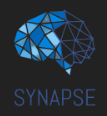

**This task has various theory questions to be answered here and there. We want y'all to go on Google or any other source and research about the same. Don't miss out on those, as they will make y'all conceptually stronger, and give a better understanding.**

#**Why NLP?**
Natural language cannot be directly understood by the computer, hence we try to convert it into numerical formats which are understood by the computer and can also retain the semantics of the language.

For this task, we will first look at the way text is preprocessed to optimize  its representation. Next, we will explore the various ways text can be processed and converted into vector representations that describe the context of that text in the best way possible.

# **NLTK- Natural Language toolkit**
Natural language processing (NLP) is a field that focuses on making natural human language usable by computer programs. NLTK, or Natural Language Toolkit, is a Python package that you can use for NLP.

NLTK documentation: https://www.nltk.org/

In [1]:
#For people using jupyter notebook, you might have to install the NLTK package. For colab users, you won't have to do so.
#!pip install nltk

In [2]:
par = """
Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.

NLP combines computational linguistics—rule-based modeling of human language—with statistical, machine learning, and deep learning models. Together, these technologies enable computers to process human language in the form of text or voice data and to ‘understand’ its full meaning, complete with the speaker or writer’s intent and sentiment.

NLP drives computer programs that translate text from one language to another, respond to spoken commands, and summarize large volumes of text rapidly—even in real time. There’s a good chance you’ve interacted with NLP in the form of voice-operated GPS systems, digital assistants, speech-to-text dictation software, customer service chatbots, and other consumer conveniences. But NLP also plays a growing role in enterprise solutions that help streamline business operations, increase employee productivity, and simplify mission-critical business processes.
"""

In [3]:
import nltk
import re
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import numpy as np #damn numpy kaha se aa gaya

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
# Sentence tokenize your paragraph, check nltk for a suitable function to do so
sen = nltk.sent_tokenize(par)

Run both the cells below, as they are the imports for performing stemming and lemmatization respectively

In [6]:
stemmer = PorterStemmer()

In [7]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [8]:
# Remove unnecessary characters (one way is regex, are there other ways?) and change the case of the sentences to lower case. Store it in a new list
# Add your code here
up_sen = []
# escapes = ''.join([chr(char) for char in range(1, 32)])
# translator = str.maketrans('', '', escapes)

for sentence in sen:
    up_sen.append(''.join(letter for letter in sentence if letter.isalnum() or letter in [' ', '—']).lower().replace("—", " "))

    '''new_sentence = re.sub(r'[^\w\s]', '', sentence).lower()
    new_sentence = new_sentence.translate(translator)
    up_sen.append(new_sentence)'''




In [9]:
#Check how your paragraph looks so far
up_sen

['natural language processing nlp refers to the branch of computer science and more specifically the branch of artificial intelligence or ai concerned with giving computers the ability to understand text and spoken words in much the same way human beings can',
 'nlp combines computational linguistics rulebased modeling of human language with statistical machine learning and deep learning models',
 'together these technologies enable computers to process human language in the form of text or voice data and to understand its full meaning complete with the speaker or writers intent and sentiment',
 'nlp drives computer programs that translate text from one language to another respond to spoken commands and summarize large volumes of text rapidly even in real time',
 'theres a good chance youve interacted with nlp in the form of voiceoperated gps systems digital assistants speechtotext dictation software customer service chatbots and other consumer conveniences',
 'but nlp also plays a gro

Before we deal with stemming and lemmatization, we need to understand what a corpus is, and no, it's not a dead body. Corpus is the collection of all the documents that you may use for your particular NLP project, usually neatly divided into a list of list of words. It is the precursor to building a vector representation of the data and can be thought of as an equivalent to a dataset consisting of words.

https://www.quora.com/What-is-corpus-corpora-in-text-mining

Stemming and lemmatization -

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/

## Stemming

In [10]:
# Create a word corpus from the sentences using word tokenization and stemming. Also, remember to avoid adding stopwords to your corpus
# Add your code here
stop_words = list(stopwords.words('english'))

stemmed_corpus = []

for sentence in up_sen:
    words = nltk.word_tokenize(sentence)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    stemmed_corpus.extend(words)


print(stemmed_corpus)

['natur', 'languag', 'process', 'nlp', 'refer', 'branch', 'comput', 'scienc', 'specif', 'branch', 'artifici', 'intellig', 'ai', 'concern', 'give', 'comput', 'abil', 'understand', 'text', 'spoken', 'word', 'much', 'way', 'human', 'be', 'nlp', 'combin', 'comput', 'linguist', 'rulebas', 'model', 'human', 'languag', 'statist', 'machin', 'learn', 'deep', 'learn', 'model', 'togeth', 'technolog', 'enabl', 'comput', 'process', 'human', 'languag', 'form', 'text', 'voic', 'data', 'understand', 'full', 'mean', 'complet', 'speaker', 'writer', 'intent', 'sentiment', 'nlp', 'drive', 'comput', 'program', 'translat', 'text', 'one', 'languag', 'anoth', 'respond', 'spoken', 'command', 'summar', 'larg', 'volum', 'text', 'rapidli', 'even', 'real', 'time', 'there', 'good', 'chanc', 'youv', 'interact', 'nlp', 'form', 'voiceoper', 'gp', 'system', 'digit', 'assist', 'speechtotext', 'dictat', 'softwar', 'custom', 'servic', 'chatbot', 'consum', 'conveni', 'nlp', 'also', 'play', 'grow', 'role', 'enterpris', 'sol

**What is Stemming?** <br>
Ans:

## Lemmatization

In [11]:
# Create a second word corpus from the sentences using word tokenization and lemmatization. Also, remember to avoid adding stopwords to your new corpus
# Add your code here
stop_words = list(stopwords.words('english'))

lemmatized_corpus = []

for sentence in up_sen:
    words = nltk.word_tokenize(sentence)
    lemm_words = []
    for word in words:
        word1 = lemmatizer.lemmatize(word, pos = "n")
        word2 = lemmatizer.lemmatize(word1, pos = "v")
        word3 = lemmatizer.lemmatize(word2, pos = "a")
        lemm_words.append(word3)
    lemmatized_corpus.extend(lemm_words)


print(lemmatized_corpus)

['natural', 'language', 'process', 'nlp', 'refer', 'to', 'the', 'branch', 'of', 'computer', 'science', 'and', 'more', 'specifically', 'the', 'branch', 'of', 'artificial', 'intelligence', 'or', 'ai', 'concern', 'with', 'give', 'computer', 'the', 'ability', 'to', 'understand', 'text', 'and', 'speak', 'word', 'in', 'much', 'the', 'same', 'way', 'human', 'be', 'can', 'nlp', 'combine', 'computational', 'linguistics', 'rulebased', 'model', 'of', 'human', 'language', 'with', 'statistical', 'machine', 'learn', 'and', 'deep', 'learn', 'model', 'together', 'these', 'technology', 'enable', 'computer', 'to', 'process', 'human', 'language', 'in', 'the', 'form', 'of', 'text', 'or', 'voice', 'data', 'and', 'to', 'understand', 'it', 'full', 'mean', 'complete', 'with', 'the', 'speaker', 'or', 'writer', 'intent', 'and', 'sentiment', 'nlp', 'drive', 'computer', 'program', 'that', 'translate', 'text', 'from', 'one', 'language', 'to', 'another', 'respond', 'to', 'speak', 'command', 'and', 'summarize', 'lar

**What is Lemmatization?** <br>
Ans:

**What is the difference between stemming and lemmatization? Is one better than the other? If yes, justify your answer. If no, determine the usecases where these can be used.** <br>
Ans:

To summarize the above preprocessing steps, create a function below with all the steps shown above, obviously perform ONE out of stemming and lemmatization not both. You can add some preprocessing steps if you deem them necessary

In [12]:
# Include all steps of removal of unnecessary characters, lowering, word tokenization, lemmatization and stopwords removal in one function
# Add your code here

def text_transform(data):
  #code here
  up_sen = []
  sen = nltk.sent_tokenize(data)
  for sentence in sen:
    up_sen.append(''.join(letter for letter in sentence if letter.isalnum() or letter in [' ', '—']).lower().replace("—", " "))
    stop_words = list(stopwords.words('english'))
    lemmatized_corpus = []
    for sentence in up_sen:
        words = nltk.word_tokenize(sentence)
        lemm_words = []
        for word in words:
            word1 = lemmatizer.lemmatize(word, pos = "n")
            word2 = lemmatizer.lemmatize(word1, pos = "v")
            word3 = lemmatizer.lemmatize(word2, pos = "a")
            lemm_words.append(word3)
        lemmatized_corpus.extend(lemm_words)
    return lemmatized_corpus

corp = text_transform(par)
print(corp)

['natural', 'language', 'process', 'nlp', 'refer', 'to', 'the', 'branch', 'of', 'computer', 'science', 'and', 'more', 'specifically', 'the', 'branch', 'of', 'artificial', 'intelligence', 'or', 'ai', 'concern', 'with', 'give', 'computer', 'the', 'ability', 'to', 'understand', 'text', 'and', 'speak', 'word', 'in', 'much', 'the', 'same', 'way', 'human', 'be', 'can']


#Text Vectorization

This is one of the most important steps in an NLP pipeline, since text vectorization is responsible for converting plain text into a numerical format that aims to capture as much context as possible. There have been numerous attempts throughtout the years to develop methods to efficiently vectorize text, each building upon the strengths of their predecessor. These generated vectors are often referred to as word embeddings.

Some of the methods used for generating word embeddings are:

1.   Count or Frequency based
*   Bag of Words
*   TF-IDF
*   One Hot Encoding



2.   Deep Learning Based Pre-Trained Models
*   Word2Vec
*   BERT

We will explore some of these in this notebook.

(OPTIONAL) An interesting read on the history and nature of word embeddings -

https://aylien.com/blog/overview-word-embeddings-history-word2vec-cbow-glove

## Count Vectorizer

CountVectorizer is an implementation of the Bag of Words method of generating embeddings. It is possibly the most simplistic way to create a vector representation of text, so do the research yourself on this one :)

In [13]:
#Run this cell after understanding what's happening here
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3), max_features=15)
x = cv.fit_transform(corp)
cv.vocabulary_

{'process': 6,
 'refer': 7,
 'to': 12,
 'the': 11,
 'branch': 2,
 'of': 4,
 'computer': 3,
 'science': 9,
 'and': 1,
 'specifically': 10,
 'or': 5,
 'ability': 0,
 'understand': 13,
 'same': 8,
 'way': 14}

In [14]:
corp[0]

'natural'

In [ ]:
x.toarray()

In [ ]:
#Explore what the get_feature_names_out function does and make a dataframe using the same
feature_names = cv.get_feature_names_out()

data = x.toarray()
df = pd.DataFrame(data, columns=feature_names)

print("DataFrame using CountVectorizer:")
print(df)


**What is the use of Count Vectorizer?** <br>
Ans:

**What do the hyperparameters ngram_range and max_features mean?** <br>
Ans: (Can refer the documentation, and can also learn about more such parameters)

## TF-IDF Vectorizer

Theory behind TF-IDF

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

Slightly easier explanation

https://www.kdnuggets.com/2022/09/convert-text-documents-tfidf-matrix-tfidfvectorizer.html#:~:text=Term%20frequency%20Inverse%20document%20frequency,relevant%20words%20in%20the%20document.

Just for fun (hehe), we will attempt to create a TF-IDF vectorizer from scratch, this is just so you get an idea of what happens behind the scenes and you can see there's no magic involved here, just some simple ol equations.

In [ ]:
word_set = []
sentences = []
sen = nltk.sent_tokenize(par)
for sent in sen:
  #Extract unnecessary characters, tokenize the sentence into words and convert it to lowercase (bonus if you do it in a single line). Append each sentence to the sentence list.
  words = nltk.word_tokenize(''.join(letter for letter in sent if letter.isalnum() or letter in [' ', '—']).lower().replace("—", " "))


  #Append word to the word_set if it isin't a stop word
  cleaned_words = [word for word in words if word not in stop_words]
  sentences.append(cleaned_words)
  word_set.extend(cleaned_words)

#Set of vocabulary
word_set = set(word_set)
#Total documents in our corpus(i.e number of sentences)
total_documents = len(sen)

#Create an index for each word in our vocab.
index_dict = {word: i for i, word in enumerate(word_set)}
#code here

#Create a count dictionary which stores the number of occurences of each word in the entire corpus
def count_dict(word_set):
  word_count = {}
  #code here
  for word in word_set:
    if word in word_count.keys():
        word_count[word] += 1
    else:
        word_count[word] = 1
  return word_count


word_count = count_dict(word_set)

#Create a function to calculate the Term Frequency for a given word in a given document
def termfreq(document, word):
    total_documents = len(document)
    document = [" ".join(sentence) for sentence in document]
    word_set = text_transform(" ".join(document))
    count_dictionary = count_dict(word_set)
    if word in count_dictionary.keys():
        return count_dictionary[word] / total_documents
    else:
        return 0

#Create a function to find Inverse Document Frequency for a given word
def inverse_doc_freq(word, document):
    num_docs_with_word = sum(1 for doc in document if word in doc)
    if num_docs_with_word > 0:
        return np.log(len(document) / (1 + num_docs_with_word))
    else:
        return 0

#Now create a function that for every word in a sentence, stores the output of the TF and IDF of that word in a vector tf_idf_vec
def tf_idf(sentence, document):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentence:
      #code
        tf = termfreq(document, word)
        idf = inverse_doc_freq(word, document)
        tf_idf_vec[index_dict[word]] = tf * idf
    return tf_idf_vec

#Now finally, for each sentence in the document, pass it through the tf_idf function to get a vector; append these vectors to get your final representation
vectors = []
#code

# sentences is the list of sentences split into words
document = sentences
# cleaned list of string sentences
print(document)

for sentence in document:
    vectors.append(tf_idf(sentence, document))
print(vectors)


In [78]:
vectors[0]

array([0.        , 0.        , 0.        , 0.3662041 , 0.        ,
       0.        , 0.        , 0.        , 0.18310205, 0.        ,
       0.18310205, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.23104906, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.46209812,
       0.        , 0.        , 0.        , 0.20273255, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.18310205, 0.        , 0.        , 0.        , 0.        ,
       0.18310205, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.18310

In [ ]:
#This is what it should like if all your hard work pays off making a tf-idf vectoriser from scratch:
vectors[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.02969222,  0.        ,  0.        ,  0.02969222,  0.        ,
        0.        ,  0.        ,  0.01095852,  0.        ,  0.00985522,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00492761,  0.        ,  0.        ,  0.        ,  0.        ,
        0.01873371,  0.        ,  0.00492761,  0.        ,  0.        ,
        0.02969222,  0.        ,  0.        ,  0.02969222,  0.        ,
        0.        ,  0.        ,  0.        ,  0.01873371,  0.02969222,
        0.        ,  0.        ,  0.02969222,  0.        , -0.00416623,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01873371,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.02969222,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.02969222,  0.01

In [ ]:
document = [" ".join(sentence) for sentence in document]
word_set = text_transform(" ".join(document))
cols = []
for word in word_set:
    if word not in cols:
        cols.append(word)
tfidf_df = pd.DataFrame(vectors,columns=cols)

# Step 7: Print the TF-IDF matrix
print("TF-IDF Matrix:")
tfidf_df

Just for good measure, import TfidfVectorizer and fit the corpus data and view the vectors it has created

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#ngram_range ad max_features for tf-idf are also important


In [ ]:
#Again, use get_feature_names_out function does and make a dataframe


We can see there are some differences between the vectorizer we created and the one we imported. Can you explain why these differences have arisen? How can we minimize this difference?

**How does the Tf-IDF Vectorizer work?** <br>
Ans:

# The (Actual) Task Begins!

Dataset link: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
# Load the dataset and store it in a dataframe


In [ ]:
# Write a function to create the corpus on the basis of the given dataset. Remember, the corpus should have the sentences separated from each other
# Also, do not forget to perform the preprocessing steps as done earlier


Use CBOW and TF_IDF to vectorize the dataset and test its classification report using the multinomial naive bayes model.

##BOW
**What is BOW?** <br>
Ans:

In [ ]:
# Import CountVectorizer and use the BOW on it
from sklearn.feature_extraction.text import CountVectorizer
cv =

#Create your X and y arrays


In [ ]:
# Perform train test split


In [ ]:
#Fit training data on Multinomial Naive Bayes


In [ ]:
#Print the accuracy and create a classification report


##TF-IDF

In [ ]:
# Write the code for tfidVectorizer, very much similar to the one you wrote for CountVectorizer
# Also, print the accuracy, and create a classification report


##Word2Vec

word2vec is a neural network based algorithm released in 2013 which captures the semantic meaning of words instead of being based solely on frequency based metrics. For example, saying 'I look good today' and 'I look fantanstic today' should be considered similar sentences, however models like TF-IDF and BOW cannot capture this similarity and consider them different.

word2vec works by ensuring the data being passed is trained to recognize context using either CBOW or Skip-gram method (check references). It is thus preferred to have a large dataset for this task. Then, one can compare similarity between words present in the dataset in a lingustic manner.


A famous example that word2vec is able to capture is the one below:
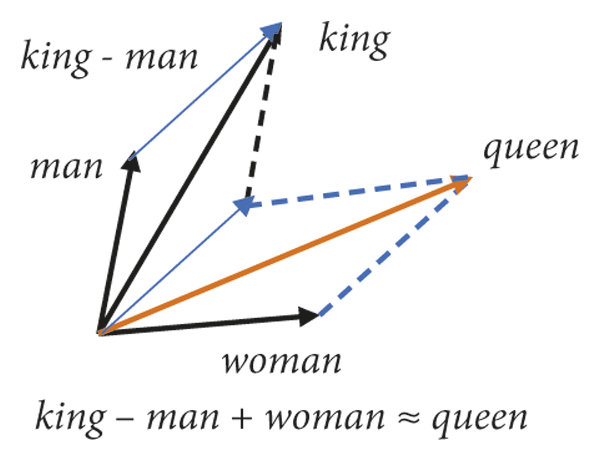

https://www.analyticsvidhya.com/blog/2021/07/word2vec-for-word-embeddings-a-beginners-guide/

https://youtu.be/viZrOnJclY0?si=J-HwOd3_Ng2CfVgU

https://www.tensorflow.org/text/tutorials/word2vec (Advanced level)

Let's try and use Word2Vec for our reviews dataset.

You can use CBOW or SkipGram (sg = 0/1) default is CBOW

Word2Vec resources: https://builtin.com/machine-learning/nlp-word2vec-python

In [ ]:
from gensim.models.word2vec import Word2Vec

model=Word2Vec(corpus, )#window, min_count, max_count, size are important hyperparameters

model.most_similar('review')

In [ ]:
model.wv['movie']

**Average Word2Vec**

In average Word2Vec, the model is fed with an average of all the vectors obtained from the vectorization techniques. For eg. in this task, our model will be fed a single array of size Nx1 which is an average vector of all the vectors in the sentence.

Why do we do this? - https://datascience.stackexchange.com/questions/93253/why-is-averaging-the-vectors-required-in-word2vec

In [ ]:
def avg_word2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [ ]:
#Use the above function to create a single Nx1 array where N is the number of sentences


In [ ]:
#Define your X and y (X is your average word2vec array, y is the sentiment)


In [ ]:
#Complete the rest of the classfication problem, i.e perform train test split, fit a model of your choice on the data, and print its classification report


# Research Task


Research how the Bidirectional Encoder Representations from Transformers (BERT) Model creates Word Embeddings and how it maintains context and captures semantic meaning between words and sentences.